# Análisis de Datos aplicables a Regresión Lineal Simple, Student Perfomance

## Elaborado por Gabriel Carrizales
### 08/03/2025



In [391]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Carga del dataset sobre el rendimiento academico de estudiantes

In [339]:
# pip install --upgrade pandas 

In [393]:
# Cargar el dataset de rendimiento estudiantil
data = pd.read_csv('student_performance_large_dataset.csv')

# Mostrar la forma del dataset (filas, columnas)
print(f"Shape: {data.shape}")

# Mostrar las primeras filas para revisar la estructura
data.head()


Shape: (10000, 15)


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


In [395]:
df = pd.DataFrame(data)
df

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D


## Limpieza del dataset

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

In [399]:
# Verificar el tipo de datos después de la transformación
print(data.dtypes)

# Muestra las primeras filas para comprobar
print(data.head())


Student_ID                                 object
Age                                         int64
Gender                                     object
Study_Hours_per_Week                        int64
Preferred_Learning_Style                   object
Online_Courses_Completed                    int64
Participation_in_Discussions               object
Assignment_Completion_Rate (%)              int64
Exam_Score (%)                              int64
Attendance_Rate (%)                         int64
Use_of_Educational_Tech                    object
Self_Reported_Stress_Level                 object
Time_Spent_on_Social_Media (hours/week)     int64
Sleep_Hours_per_Night                       int64
Final_Grade                                object
dtype: object
  Student_ID  Age  Gender  Study_Hours_per_Week Preferred_Learning_Style  \
0     S00001   18  Female                    48              Kinesthetic   
1     S00002   29  Female                    30          Reading/Writing   
2     S0

In [401]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador
encoder = LabelEncoder()

# Columnas categóricas que necesitamos transformar
columns_to_encode = ['Gender', 'Preferred_Learning_Style', 'Participation_in_Discussions',
                     'Use_of_Educational_Tech', 'Self_Reported_Stress_Level', 'Final_Grade']

# Aplicar la transformación de LabelEncoder a las columnas categóricas
for col in columns_to_encode:
    data[col] = encoder.fit_transform(data[col])

# Verificar los cambios en los datos
print(data.head())  # Para mostrar las primeras filas y verificar que se hizo correctamente
print(data.dtypes)  # Para verificar los tipos de datos


  Student_ID  Age  Gender  Study_Hours_per_Week  Preferred_Learning_Style  \
0     S00001   18       0                    48                         1   
1     S00002   29       0                    30                         2   
2     S00003   20       0                    47                         1   
3     S00004   23       0                    13                         0   
4     S00005   19       0                    24                         0   

   Online_Courses_Completed  Participation_in_Discussions  \
0                        14                             1   
1                        20                             0   
2                        11                             0   
3                         0                             1   
4                        19                             1   

   Assignment_Completion_Rate (%)  Exam_Score (%)  Attendance_Rate (%)  \
0                             100              69                   66   
1                     

In [403]:
df = pd.DataFrame(data)
df

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,0,48,1,14,1,100,69,66,1,0,9,8,2
1,S00002,29,0,30,2,20,0,71,40,57,1,2,28,8,3
2,S00003,20,0,47,1,11,0,60,43,79,1,1,13,7,3
3,S00004,23,0,13,0,0,1,63,70,60,1,1,24,10,1
4,S00005,19,0,24,0,19,1,59,63,93,1,2,26,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,1,30,0,6,1,62,58,76,1,2,17,6,2
9996,S09997,23,0,16,3,8,1,54,84,86,1,2,6,5,1
9997,S09998,26,1,23,3,3,1,54,40,70,0,2,20,8,3
9998,S09999,18,1,41,2,7,1,66,45,90,1,1,6,8,3


In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  int32 
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  int32 
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  int32 
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  in

In [407]:
df.isnull().sum().to_frame('NaN value')

,NaN value
Student_ID,0
Age,0
Gender,0
Study_Hours_per_Week,0
Preferred_Learning_Style,0
Online_Courses_Completed,0
Participation_in_Discussions,0
Assignment_Completion_Rate (%),0
Exam_Score (%),0
Attendance_Rate (%),0


In [409]:
for col in df:
    print(f" {col}: {df[col].nunique()}")

 Student_ID: 10000
 Age: 12
 Gender: 3
 Study_Hours_per_Week: 45
 Preferred_Learning_Style: 4
 Online_Courses_Completed: 21
 Participation_in_Discussions: 2
 Assignment_Completion_Rate (%): 51
 Exam_Score (%): 61
 Attendance_Rate (%): 51
 Use_of_Educational_Tech: 2
 Self_Reported_Stress_Level: 3
 Time_Spent_on_Social_Media (hours/week): 31
 Sleep_Hours_per_Night: 7
 Final_Grade: 4


In [411]:
df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,23.4788,3.461986,18.0,20.0,23.0,27.0,29.0
Gender,10000.0,0.5560,0.572797,0.0,0.0,1.0,1.0,2.0
Study_Hours_per_Week,10000.0,27.1303,13.002547,5.0,16.0,27.0,38.0,49.0
Preferred_Learning_Style,10000.0,1.5078,1.117078,0.0,1.0,2.0,3.0,3.0
Online_Courses_Completed,10000.0,10.0079,6.136726,0.0,5.0,10.0,15.0,20.0
Participation_in_Discussions,10000.0,0.5996,0.490004,0.0,0.0,1.0,1.0,1.0
Assignment_Completion_Rate (%),10000.0,74.9220,14.675437,50.0,62.0,75.0,88.0,100.0
Exam_Score (%),10000.0,70.1889,17.649447,40.0,55.0,70.0,85.0,100.0
Attendance_Rate (%),10000.0,75.0851,14.749251,50.0,62.0,75.0,88.0,100.0
Use_of_Educational_Tech,10000.0,0.7022,0.457314,0.0,0.0,1.0,1.0,1.0


## Analisis Exploratorio de datos

In [413]:
# Verificar el tipo de datos y la estructura del DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  int32 
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  int32 
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  int32 
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  in

## Estadisticas descriptivas

In [415]:
# Para incluir todas las columnas (numéricas y de tipo objeto)
print(df.describe(include='all'))


       Student_ID           Age        Gender  Study_Hours_per_Week  \
count       10000  10000.000000  10000.000000          10000.000000   
unique      10000           NaN           NaN                   NaN   
top        S00001           NaN           NaN                   NaN   
freq            1           NaN           NaN                   NaN   
mean          NaN     23.478800      0.556000             27.130300   
std           NaN      3.461986      0.572797             13.002547   
min           NaN     18.000000      0.000000              5.000000   
25%           NaN     20.000000      0.000000             16.000000   
50%           NaN     23.000000      1.000000             27.000000   
75%           NaN     27.000000      1.000000             38.000000   
max           NaN     29.000000      2.000000             49.000000   

        Preferred_Learning_Style  Online_Courses_Completed  \
count               10000.000000              10000.000000   
unique                 

## Visualización de la Distribución

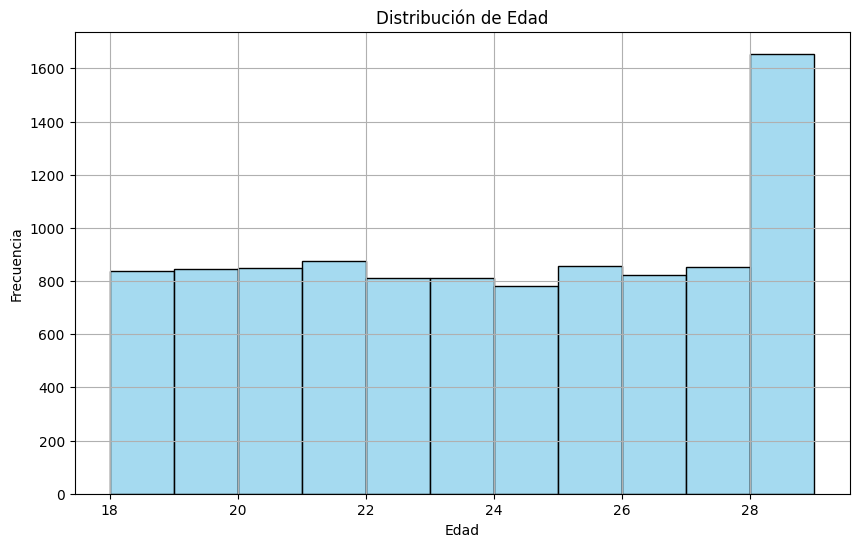

In [417]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=False, bins=np.arange(df['Age'].min(), df['Age'].max()+1, 1), color='skyblue')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


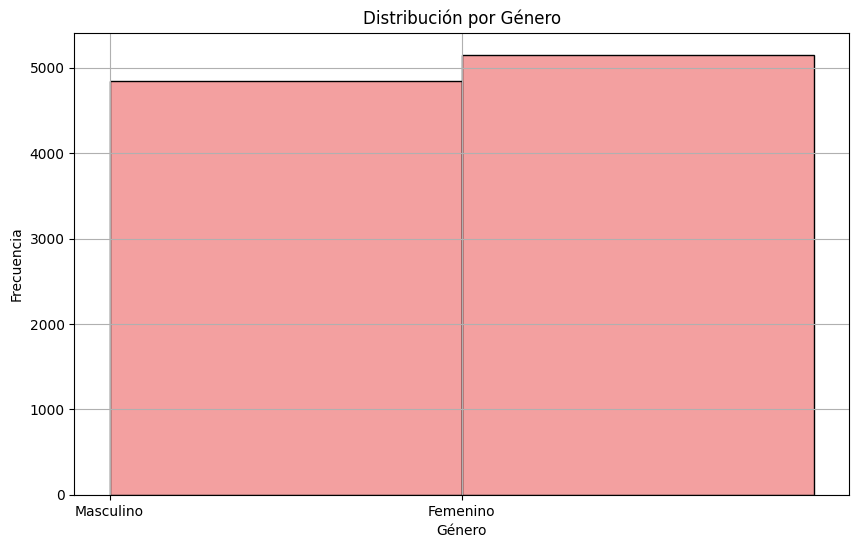

In [419]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Gender'], kde=False, bins=2, color='lightcoral')
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.xticks([0, 1], ['Masculino', 'Femenino'])  # Esto es para mostrar los nombres en el eje X
plt.show()


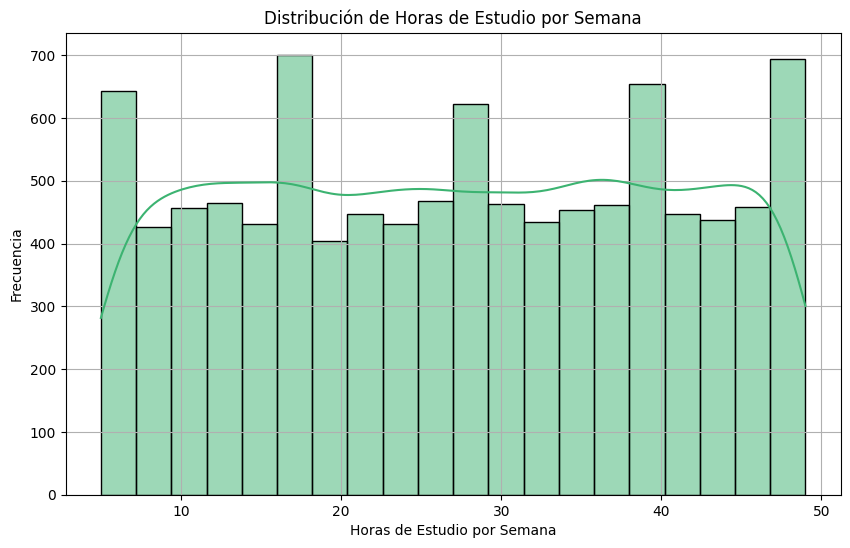

In [421]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Study_Hours_per_Week'], kde=True, bins=20, color='mediumseagreen')
plt.title('Distribución de Horas de Estudio por Semana')
plt.xlabel('Horas de Estudio por Semana')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


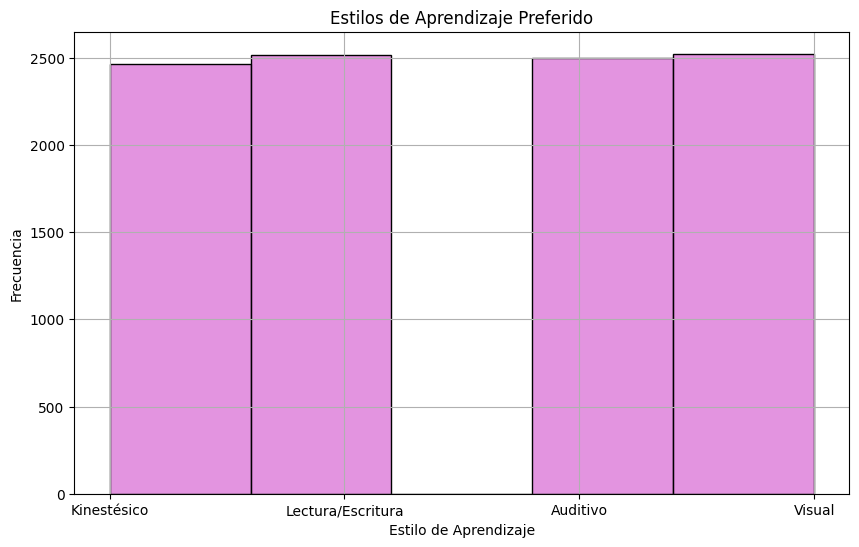

In [423]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Preferred_Learning_Style'], kde=False, bins=5, color='orchid')
plt.title('Estilos de Aprendizaje Preferido')
plt.xlabel('Estilo de Aprendizaje')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.xticks([0, 1, 2, 3], ['Kinestésico', 'Lectura/Escritura', 'Auditivo', 'Visual'])  # Etiquetas personalizadas en el eje X
plt.show()


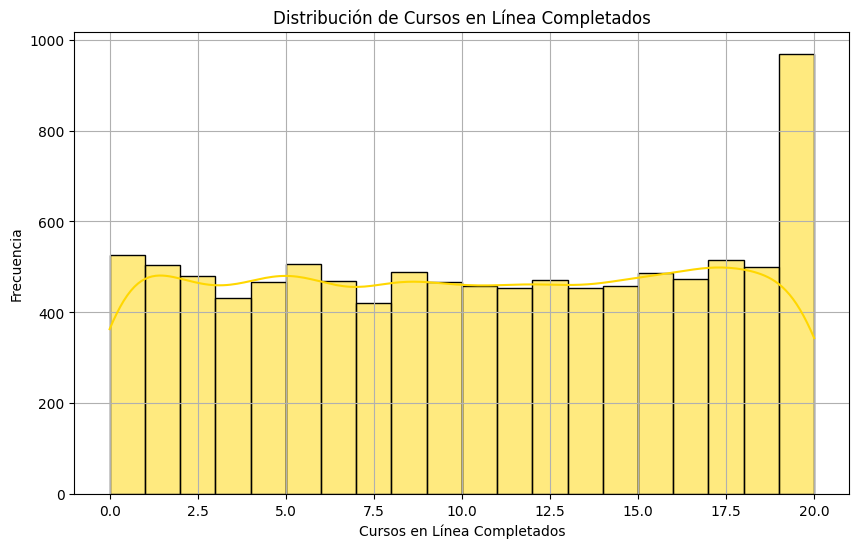

In [425]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Online_Courses_Completed'], kde=True, bins=20, color='gold')
plt.title('Distribución de Cursos en Línea Completados')
plt.xlabel('Cursos en Línea Completados')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


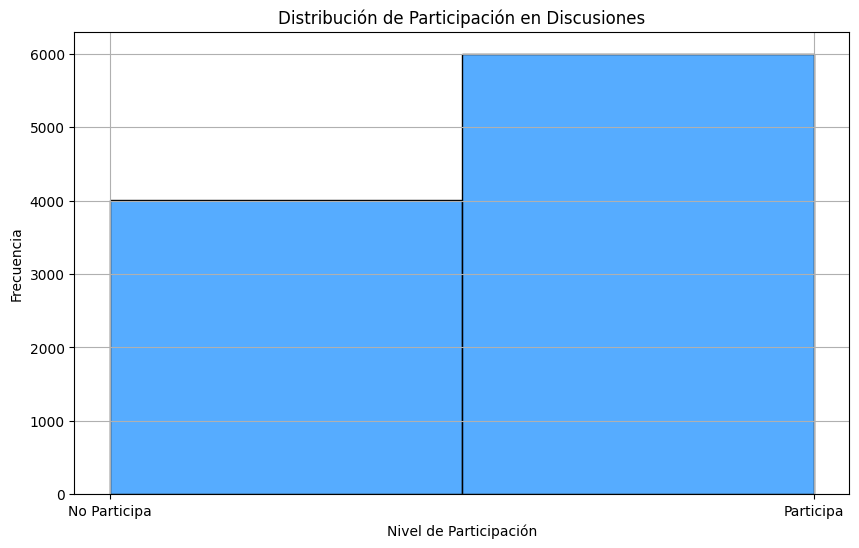

In [427]:
# Graficar usando los valores numéricos
plt.figure(figsize=(10, 6))
sns.histplot(df['Participation_in_Discussions'], kde=False, bins=2, color='dodgerblue')

# Cambiar las etiquetas del eje x para que se muestren como texto
plt.xticks([0, 1], ['No Participa', 'Participa'])

# Títulos y etiquetas
plt.title('Distribución de Participación en Discusiones')
plt.xlabel('Nivel de Participación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


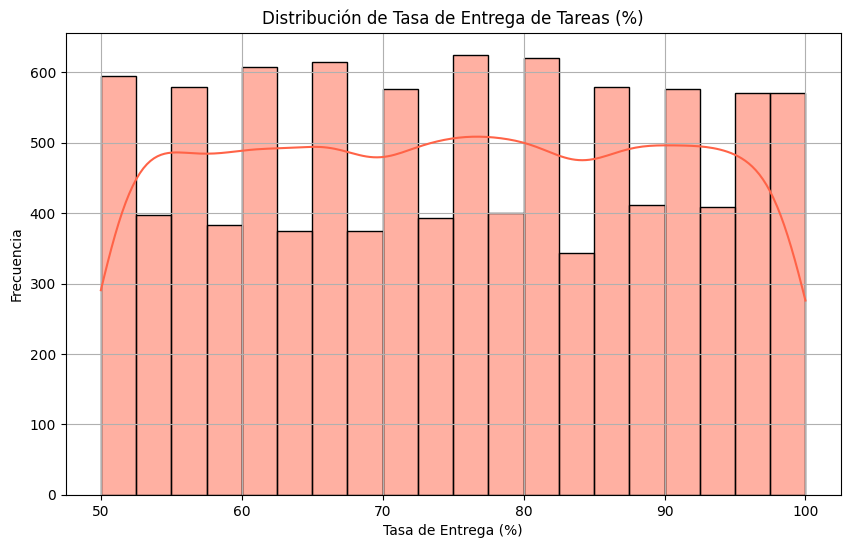

In [429]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Assignment_Completion_Rate (%)'], kde=True, bins=20, color='tomato')
plt.title('Distribución de Tasa de Entrega de Tareas (%)')
plt.xlabel('Tasa de Entrega (%)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


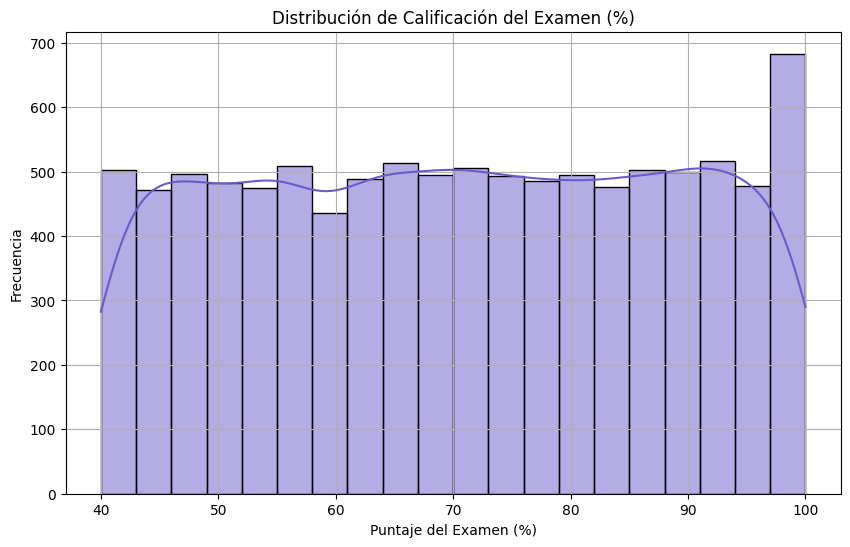

In [431]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Exam_Score (%)'], kde=True, bins=20, color='slateblue')
plt.title('Distribución de Calificación del Examen (%)')
plt.xlabel('Puntaje del Examen (%)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


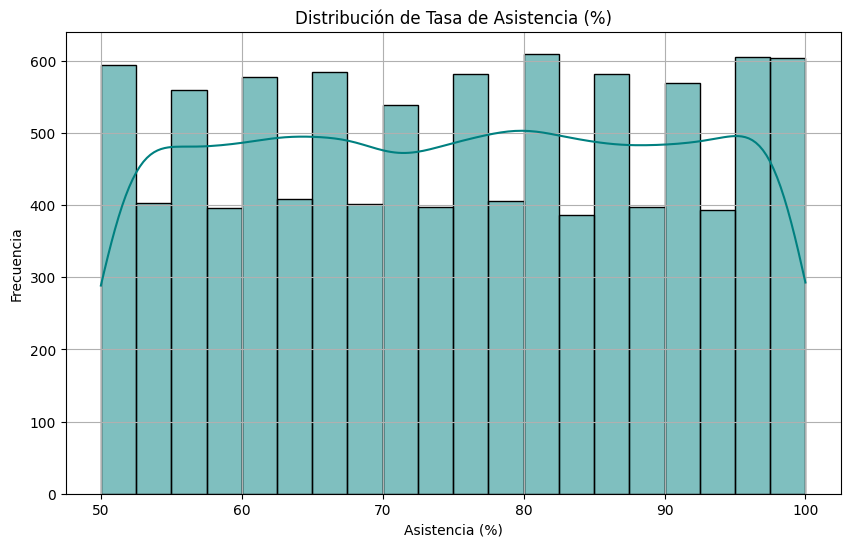

In [433]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Attendance_Rate (%)'], kde=True, bins=20, color='teal')
plt.title('Distribución de Tasa de Asistencia (%)')
plt.xlabel('Asistencia (%)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


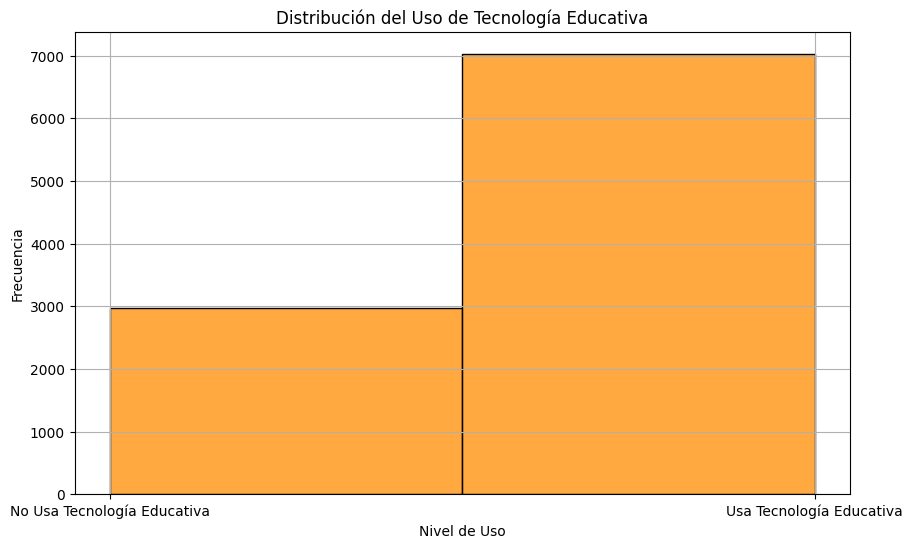

In [435]:
# Graficar usando los valores numéricos sin mapear
plt.figure(figsize=(10, 6))
sns.histplot(df['Use_of_Educational_Tech'], kde=False, bins=2, color='darkorange')

# Cambiar las etiquetas del eje x para que se muestren como texto
plt.xticks([0, 1], ['No Usa Tecnología Educativa', 'Usa Tecnología Educativa'])

# Títulos y etiquetas
plt.title('Distribución del Uso de Tecnología Educativa')
plt.xlabel('Nivel de Uso')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


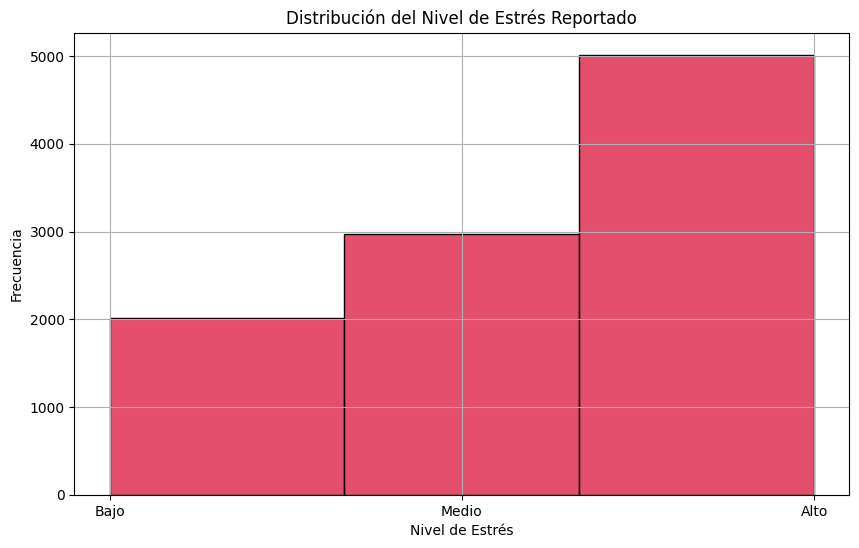

In [437]:
# Graficar usando los valores numéricos sin mapear
plt.figure(figsize=(10, 6))
sns.histplot(df['Self_Reported_Stress_Level'], kde=False, bins=3, color='crimson')

# Cambiar las etiquetas del eje x para que se muestren como texto
plt.xticks([0, 1, 2], ['Bajo', 'Medio', 'Alto'])

# Títulos y etiquetas
plt.title('Distribución del Nivel de Estrés Reportado')
plt.xlabel('Nivel de Estrés')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


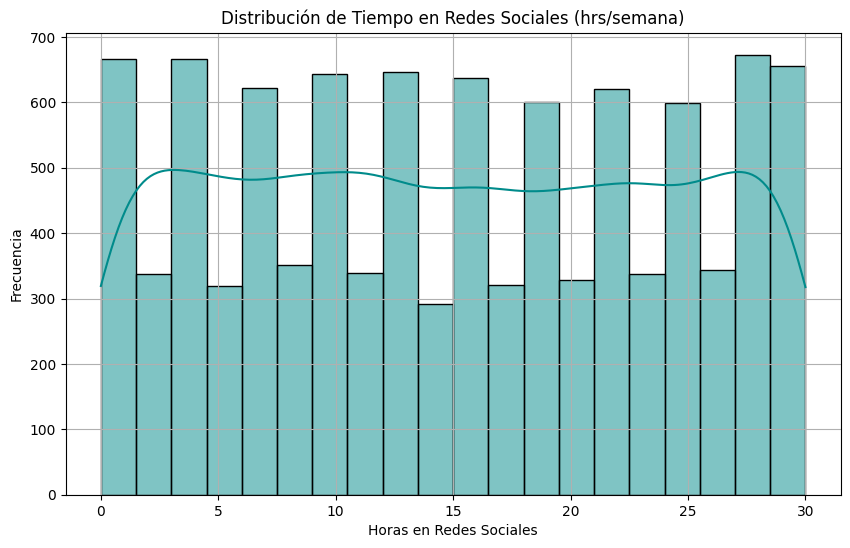

In [439]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Time_Spent_on_Social_Media (hours/week)'], kde=True, bins=20, color='darkcyan')
plt.title('Distribución de Tiempo en Redes Sociales (hrs/semana)')
plt.xlabel('Horas en Redes Sociales')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


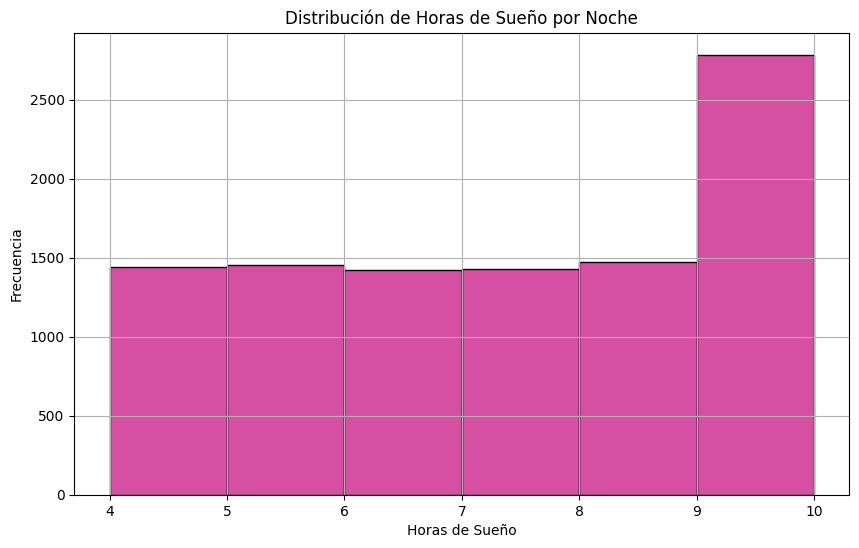

In [441]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep_Hours_per_Night'], kde=False, bins=np.arange(df['Sleep_Hours_per_Night'].min(), df['Sleep_Hours_per_Night'].max()+1, 1), color='mediumvioletred')
plt.title('Distribución de Horas de Sueño por Noche')
plt.xlabel('Horas de Sueño')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


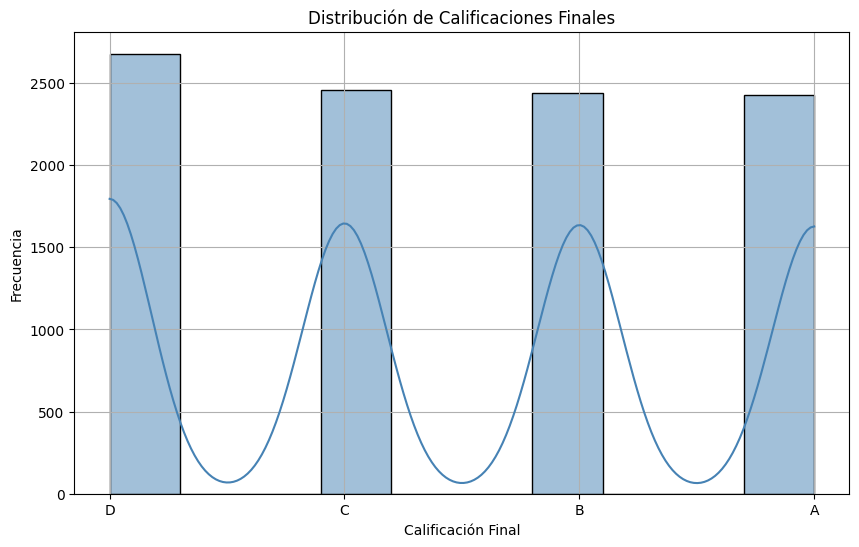

In [445]:
# Graficar usando los valores numéricos de las calificaciones
plt.figure(figsize=(10, 6))
sns.histplot(df['Final_Grade'], kde=True, bins=10, color='steelblue')

# Cambiar las etiquetas del eje X para que se muestren como letras
plt.xticks([0.0, 1.0, 2.0, 3.0], ['D', 'C', 'B', 'A'])

# Títulos y etiquetas
plt.title('Distribución de Calificaciones Finales')
plt.xlabel('Calificación Final')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [447]:
# Verificar los tipos de datos de todas las columnas
print(df.dtypes)


Student_ID                                 object
Age                                         int64
Gender                                      int32
Study_Hours_per_Week                        int64
Preferred_Learning_Style                    int32
Online_Courses_Completed                    int64
Participation_in_Discussions                int32
Assignment_Completion_Rate (%)              int64
Exam_Score (%)                              int64
Attendance_Rate (%)                         int64
Use_of_Educational_Tech                     int32
Self_Reported_Stress_Level                  int32
Time_Spent_on_Social_Media (hours/week)     int64
Sleep_Hours_per_Night                       int64
Final_Grade                                 int32
dtype: object


In [449]:
# Revisar las primeras filas para verificar el mapeo correcto
print(df.head())

# Verificar si hay valores nulos en el dataframe
print(df.isnull().sum())


  Student_ID  Age  Gender  Study_Hours_per_Week  Preferred_Learning_Style  \
0     S00001   18       0                    48                         1   
1     S00002   29       0                    30                         2   
2     S00003   20       0                    47                         1   
3     S00004   23       0                    13                         0   
4     S00005   19       0                    24                         0   

   Online_Courses_Completed  Participation_in_Discussions  \
0                        14                             1   
1                        20                             0   
2                        11                             0   
3                         0                             1   
4                        19                             1   

   Assignment_Completion_Rate (%)  Exam_Score (%)  Attendance_Rate (%)  \
0                             100              69                   66   
1                     

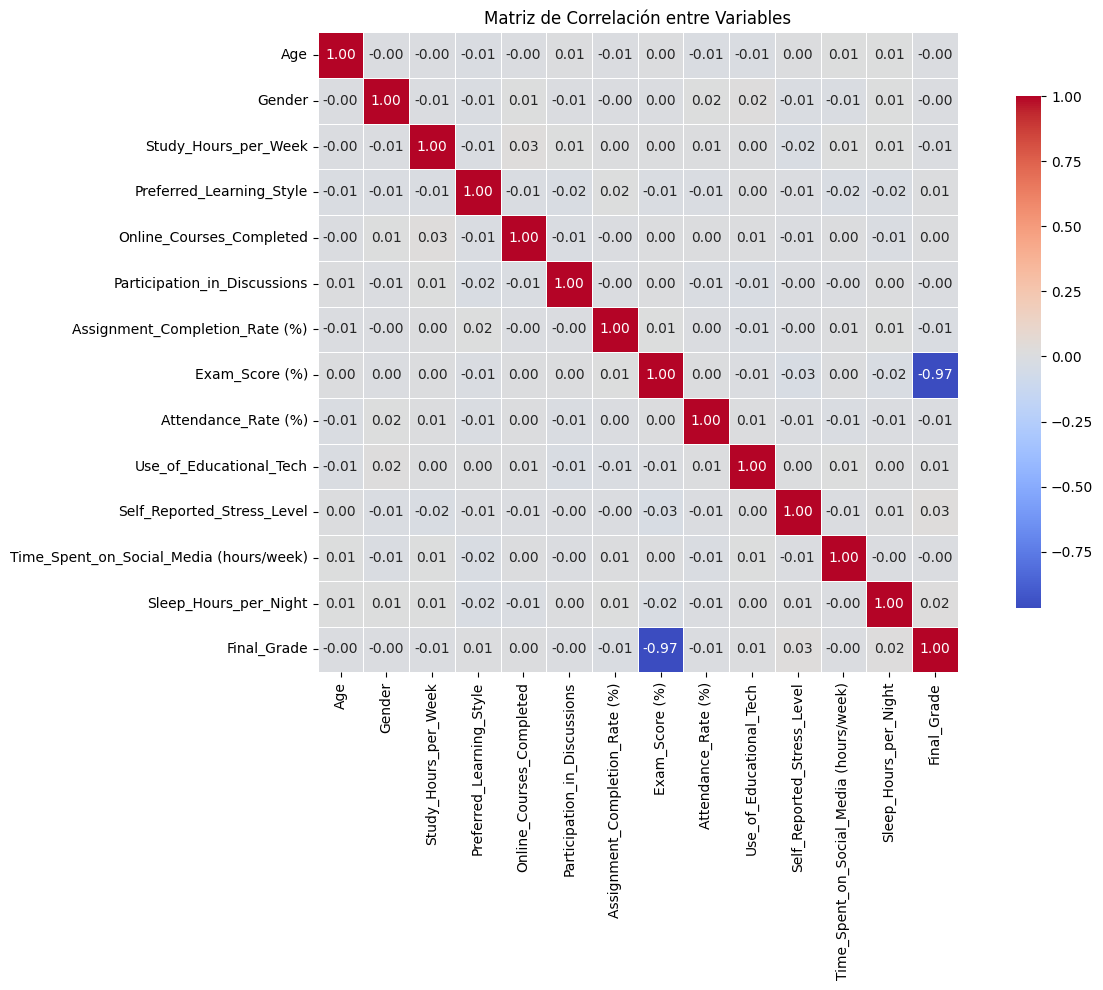

In [451]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular matriz de correlación
correlacion = df.drop(columns='Student_ID').corr()

# Mostrar el heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlacion, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación entre Variables')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


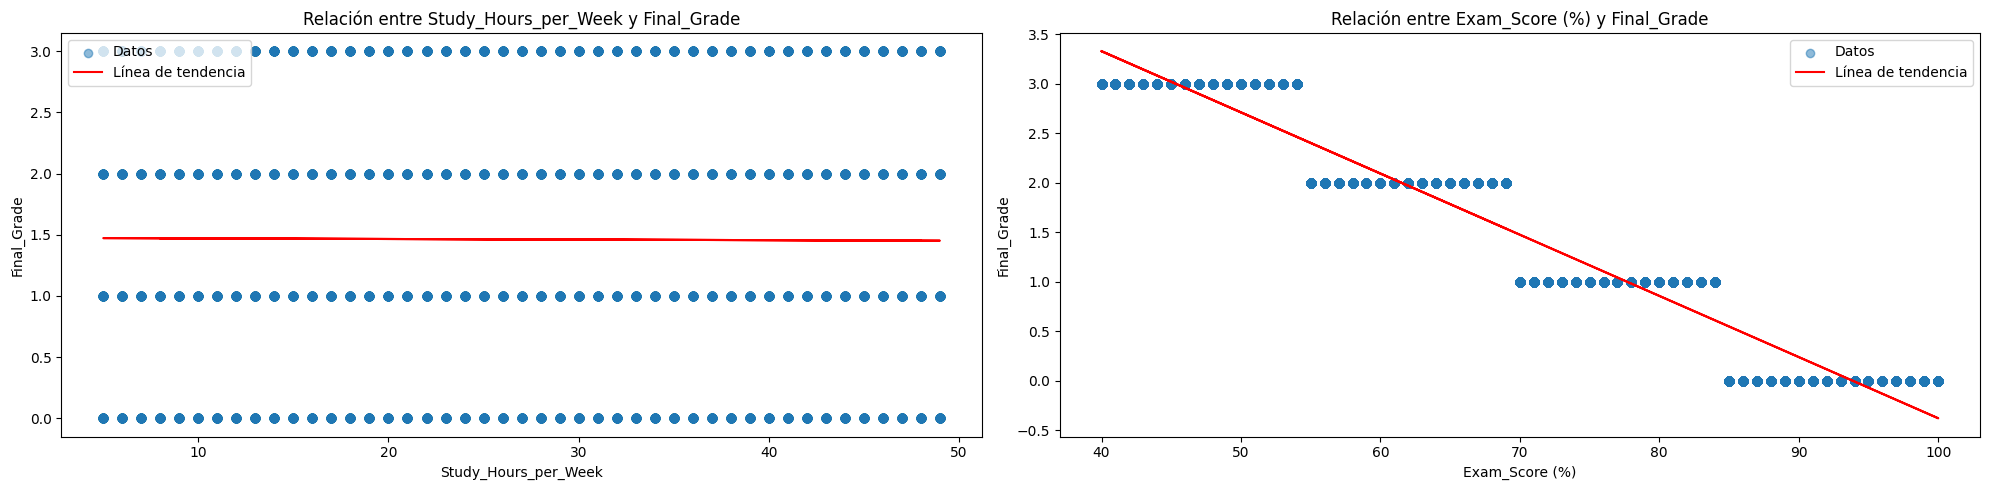

In [475]:
import numpy as np
import matplotlib.pyplot as plt

# Seleccionar las características a comparar con Final_Grade
features = ['Study_Hours_per_Week', 'Exam_Score (%)']  # Puedes cambiar estas por otras variables
target = df['Final_Grade']

# Crear figura con subplots
plt.figure(figsize=(20, 5))

for i, col in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    x = df[col]
    y = target

    # Gráfico de dispersión
    plt.scatter(x, y, marker='o', alpha=0.5, label='Datos')

    # Línea de regresión lineal
    coef = np.polyfit(x, y, 1)  # Ajuste de grado 1
    poly1d_fn = np.poly1d(coef)
    plt.plot(x, poly1d_fn(x), color='red', label='Línea de tendencia')

    plt.title(f'Relación entre {col} y Final_Grade')
    plt.xlabel(col)
    plt.ylabel('Final_Grade')
    plt.legend()

plt.tight_layout()
plt.show()


In [477]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Definir la variable objetivo
y = df['Final_Grade']

# Seleccionar las características numéricas predictoras
X = df[['Study_Hours_per_Week', 'Exam_Score (%)', 'Assignment_Completion_Rate (%)', 
        'Attendance_Rate (%)', 'Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night']]

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar métricas de evaluación
metrics = pd.DataFrame({
    "Métrica": ["Error Absoluto Medio (MAE)", "Error Cuadrático Medio (MSE)", 
                "Raíz del Error Cuadrático Medio (RMSE)", "Coeficiente de Determinación (R²)"],
    "Valor": [mae, mse, rmse, r2]
})

print("\nMétricas de Evaluación del Modelo")
print(metrics)



Métricas de Evaluación del Modelo
                                  Métrica     Valor
0              Error Absoluto Medio (MAE)  0.240955
1            Error Cuadrático Medio (MSE)  0.079687
2  Raíz del Error Cuadrático Medio (RMSE)  0.282289
3       Coeficiente de Determinación (R²)  0.937923


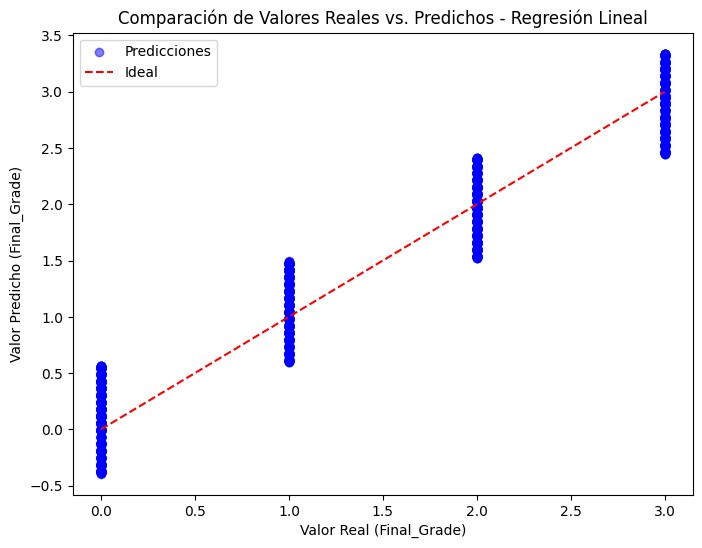

In [479]:
import matplotlib.pyplot as plt

# Graficar los valores reales vs. predichos
plt.figure(figsize=(8, 6))

# Gráfico de dispersión
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predicciones")

# Línea ideal (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label="Ideal")

# Etiquetas y título
plt.xlabel("Valor Real (Final_Grade)")
plt.ylabel("Valor Predicho (Final_Grade)")
plt.title("Comparación de Valores Reales vs. Predichos - Regresión Lineal")
plt.legend()

# Mostrar gráfico
plt.show()
